In [1]:
# install tensiometer
# install camb
# install getdist
# install cobaya
# install bilby

In [2]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

os.environ['PATH'] = r'/farmdisk1/cosmology/Libraries/texlive/2024/bin/x86_64-linux' #+ os.environ['PATH']
# Enable LaTeX in Matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')
mpl.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % Se necessario
    \newcommand{\sfont}[1]{{\scriptscriptstyle\rm #1}}  % Definizione di \sfont
'''

In [3]:
# initial imports:
import sys, os
import matplotlib.pyplot as plt

# getdist imports:
from getdist import plots, MCSamples

# tensiometer local imports:
here = os.path.dirname(os.getcwd())
tensiometer_path = os.path.join(here, 'tensiometer')
sys.path.append(tensiometer_path)

import tensiometer
print('Tensiometer version:', tensiometer.__version__)
print('Tensiometer path:', tensiometer.__path__)

Tensiometer version: 1.0.2
Tensiometer path: ['/farmdisk1/emaragliano/miniconda3/envs/cobaya_env/lib/python3.10/site-packages/tensiometer']


In [4]:
# chains paths:

chains_dir = os.path.join('chains')

In [5]:
# getdist settings:

getdist_settings = {
    'smooth_scale_1D': 0.3,
    'smooth_scale_2D': 0.4,
    'boundary_correction_order': 1,
    'mult_bias_correction_order': 1,
    }

In [11]:
# import chain
from cobaya import load_samples

name = '01p2_LCDM_CMB_PlanckTTTEEE'
chain_PlanckTTTEEE = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_PlanckTTTEEE.label = name
chain_PlanckTTTEEE.root = os.path.join(chains_dir, name)
chain_PlanckTTTEEE.updateSettings(getdist_settings)
chain_PlanckTTTEEE.updateBaseStatistics()
chain_PlanckTTTEEE.getConvergeTests()
print(chain_PlanckTTTEEE.label+': R =', round(chain_PlanckTTTEEE.GelmanRubin, 4))

name = '01p3_LCDM_CMB_ACTTTTEEE'
chain_ACTTTTEEE = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_ACTTTTEEE.label = name
chain_ACTTTTEEE.root = os.path.join(chains_dir, name)
chain_ACTTTTEEE.updateSettings(getdist_settings)
chain_ACTTTTEEE.updateBaseStatistics()
chain_ACTTTTEEE.getConvergeTests()
print(chain_ACTTTTEEE.label+': R =', round(chain_ACTTTTEEE.GelmanRubin, 4))

name = '02p2_LCDM_CMB_all'
chain_all = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_all.label = name
chain_all.root = os.path.join(chains_dir, name)
chain_all.updateSettings(getdist_settings)
chain_all.updateBaseStatistics()
chain_all.getConvergeTests()
print(chain_all.label+': R =', round(chain_all.GelmanRubin, 4))



01p2_LCDM_CMB_PlanckTTTEEE: R = 0.0079
01p3_LCDM_CMB_ACTTTTEEE: R = 0.0113
02p2_LCDM_CMB_all: R = 0.0108


In [7]:
chain_PlanckTTTEEE.getParamNames().list()

['H0',
 'logA',
 'ns',
 'ombh2',
 'omch2',
 'tau',
 'A_planck',
 'A',
 'As',
 'DHBBN',
 'YHe',
 'Y_p',
 'age',
 'clamp',
 'omega_de',
 'omegam',
 'omegamh2',
 'rdrag',
 's8h5',
 'S8',
 'S8_optimal',
 's8omegamp25',
 'sigma8',
 'thetastar',
 'zrei',
 'chi2__CMB',
 'minuslogprior',
 'minuslogprior__0',
 'chi2',
 'chi2__act_dr6_cmbonly.PlanckActCut']

All LCDM parameters

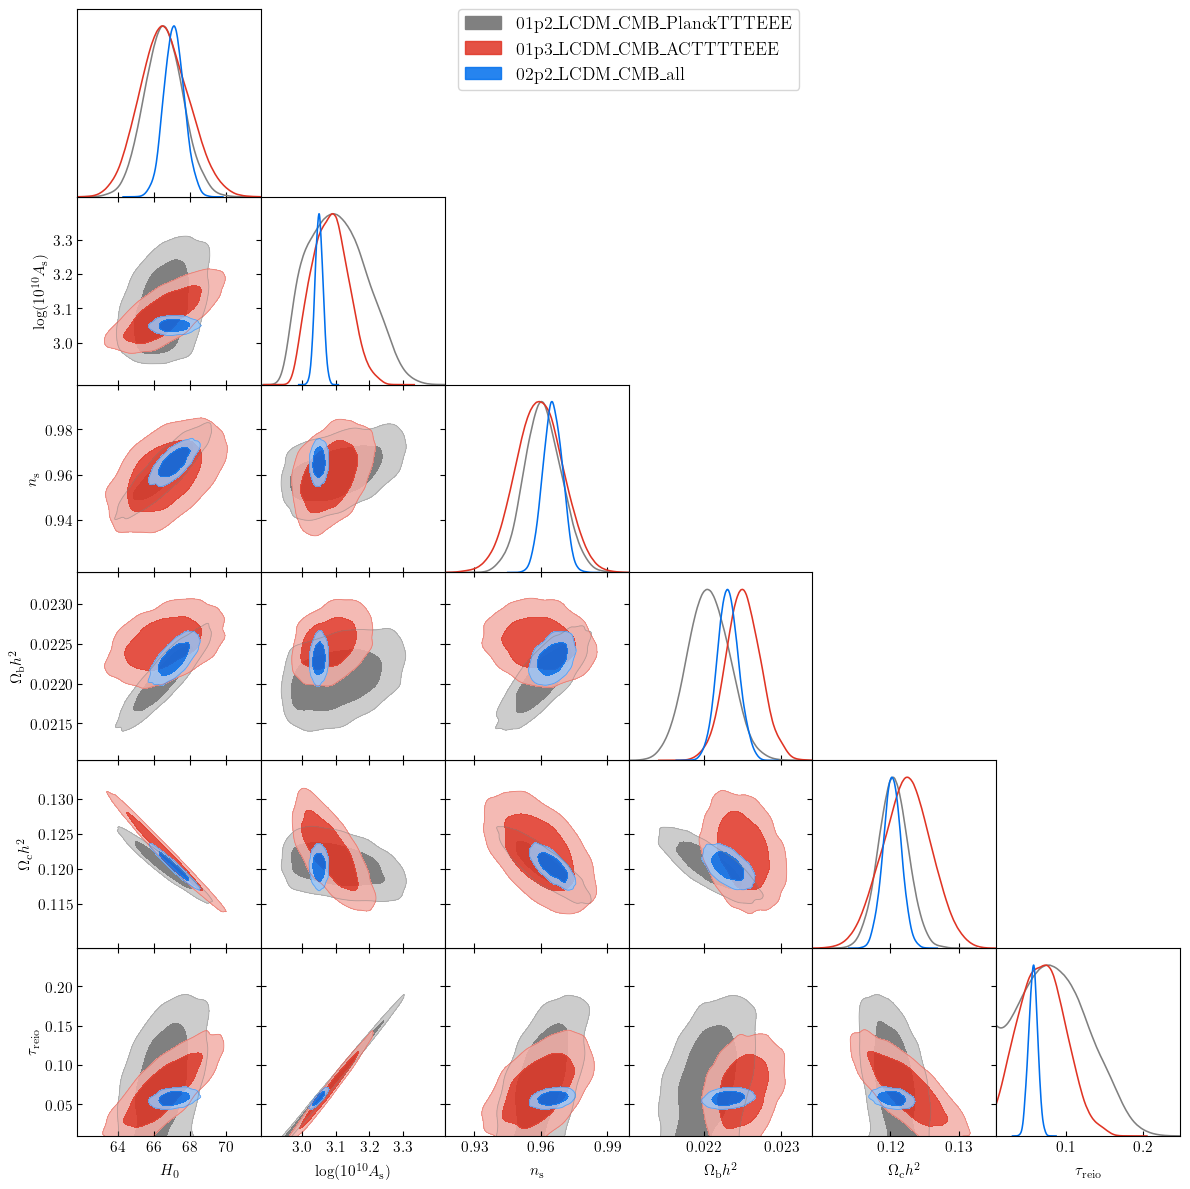

In [15]:
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 14
g.settings.legend_fontsize = 16
g.settings.linewidth = 2.0
getdist_settings['smooth_scale_1D'] = 0.3
getdist_settings['smooth_scale_2D'] = 0.3
chain_PlanckTTTEEE.updateSettings(getdist_settings)
chain_PlanckTTTEEE.updateBaseStatistics()

g.triangle_plot(
    [chain_PlanckTTTEEE, chain_ACTTTTEEE, chain_all],
    params=['H0','logA',  'ns','ombh2','omch2','tau'],
    filled=True,
    
)

#g.export('plots/LCDM_triangle_plot_all_.pdf', dpi=300)

    

In [ ]:
#model.__dict__